## Machine Learning Foundations
# Evaluating Model Performance - Classification
Sumudu Tennakoon, PhD

<hr>
To learn more about Python, refeer to the following websites

* Python : www.python.org

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/

In [1]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns
from sklearn import tree

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

# 1. Loading the Dataset

In [2]:
file_name = 'https://raw.githubusercontent.com/SumuduTennakoon/MLFoundations/main/Datasets/income_data.csv'

# Load CSV File
data = pd.read_csv(file_name)
data.sample(10)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
1688,1688,53,Private,117496,9th,5,Divorced,Other-service,Not-in-family,White,Female,0.0,0.0,36.0,Canada,<=50K
17221,17228,41,Local-gov,33068,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0.0,1974.0,40.0,United-States,<=50K
27654,2836,24,Private,199005,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0.0,0.0,25.0,United-States,<=50K.
15157,15163,25,Private,207875,Some-college,10,Never-married,Farming-fishing,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
32085,7267,19,Private,153019,HS-grad,9,Never-married,Exec-managerial,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
34637,9819,20,Private,367240,Some-college,10,Never-married,Other-service,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K.
33618,8800,44,Self-emp-not-inc,234767,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,30.0,United-States,>50K.
31955,7137,37,Federal-gov,54595,HS-grad,9,Never-married,Adm-clerical,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K.
24580,24595,28,Private,113870,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
21545,21556,37,Self-emp-inc,188774,11th,7,Married-spouse-absent,Sales,Not-in-family,White,Male,0.0,0.0,60.0,?,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41095 entries, 0 to 41094
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      41095 non-null  int64  
 1   age             41095 non-null  int64  
 2   workclass       41095 non-null  object 
 3   fnlwgt          41095 non-null  int64  
 4   education       41095 non-null  object 
 5   education_num   41095 non-null  int64  
 6   marital_status  41095 non-null  object 
 7   occupation      41095 non-null  object 
 8   relationship    41095 non-null  object 
 9   race            41095 non-null  object 
 10  sex             41095 non-null  object 
 11  capital_gain    41094 non-null  float64
 12  capital_loss    41094 non-null  float64
 13  hours_per_week  41094 non-null  float64
 14  native_country  41094 non-null  object 
 15  class           41094 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 5.0+ MB


In [4]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,41095.0,NaN,NaN,NaN,10721.02594,6645.180596,0.0,5138.0,10275.0,15415.0,24833.0
age,41095.0,NaN,NaN,NaN,38.669425,13.748164,17.0,28.0,37.0,48.0,90.0
workclass,41095,9,Private,28451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,41095.0,NaN,NaN,NaN,189652.134737,105499.712269,12285.0,117587.0,178109.0,237563.5,1490400.0
education,41095,16,HS-grad,13345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,41095.0,NaN,NaN,NaN,10.079353,2.560906,1.0,9.0,10.0,12.0,16.0
marital_status,41095,7,Married-civ-spouse,18770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,41095,15,Prof-specialty,5193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,41095,6,Husband,16520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,41095,5,White,35180,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Pre-Processing Tasks
Reuse Code from Feature Engineering Notebook

In [5]:
# Drop unwanted column
data.drop(labels='Unnamed: 0', axis=1, inplace=True)

# Drop rows with missing values
data.dropna(how='any', axis=0, inplace=True)

# Remove leading and trailing spaces in string values
def remove_spaces(data, columns):
    for column in columns:
        data[column] = data[column].str.strip()
    return data

columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'class']
data = remove_spaces(data, columns)

# Resolve duplicate representation in 'class' column
data['class'].replace('>50K.', '>50K', inplace=True)
data['class'].replace('<=50K.', '<=50K', inplace=True)

# Convert 'class' column to Binary Column
# "<=50K" -> 0
# ">50K"  -> 1
data['earn_gt_50K'] = np.where(data['class']=='>50K',1,0)

# Create Unique ID for Each Row
data['ID'] = data.index+1

# Rearrange Columns 
data = data[['ID', 'age', 'workclass', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'earn_gt_50K']]

# Optimize Memory Usage
data['age'] = data['age'].astype('int8')
data['education_num'] = data['education_num'].astype('int8')
data['hours_per_week'] = data['hours_per_week'].astype('float32')
data['capital_gain'] = data['capital_gain'].astype('float32')
data['capital_loss'] = data['capital_loss'].astype('float32')

data['workclass'] = data['workclass'].astype('category')
data['education'] = data['education'].astype('category')
data['marital_status'] = data['marital_status'].astype('category')
data['education'] = data['education'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data['relationship'] = data['relationship'].astype('category')
data['race'] = data['race'].astype('category')
data['sex'] = data['sex'].astype('category')
data['native_country'] = data['native_country'].astype('category')

# save as picke file (binary)
#data.to_pickle('income_data_cleaned.pkl')

# Save as .csv
#data.to_csv('income_data_cleaned.csv', index=False)

data.head()

,ID,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,earn_gt_50K
0,1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0
1,2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0
2,3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0
3,4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,0
4,5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,0


# 3. Feature Engineering
Reuse Code from Feature Engineering Notebook

In [6]:
# Functions
def min_max_scalar(data, column):
    max_value = data[column].max()
    min_value = data[column].min()
    data[f'{column}_scaled'] = (data[column]-min_value)/(max_value-min_value)
    return data

def z_score(data, column):
    mean = data[column].mean()
    std = data[column].std()
    data[f'{column}_zscore'] = (data[column]-mean)/std
    return data

def numeric_to_categorical(data, column, bin_edges, labels):
    data[F'{column}_group'] = pd.cut(x=data[column], bins=bin_edges, labels=labels)
    return data

def one_hot_encode(data, columns_to_keep, columns_to_one_hot):
    dummy_columns = pd.get_dummies(data[columns_to_one_hot], drop_first=True)
    data_one_hot = pd.concat([data[columns_to_keep], dummy_columns], axis=1)
    one_hot_columns = dummy_columns.columns
    return data_one_hot, one_hot_columns

# Pre-processing tasks

#sex
data['is_male'] = np.where(data['sex']=='Male', 1,0)

# workclass
data['workclass_group'] = data['workclass'].replace({'?':'Other', 'Without-pay':'Other', 'Never-worked':'Other', 'Local-gov':'Local-State-gov', 'State-gov':'Local-State-gov'})
data['workclass_num'] = data['workclass_group'].replace({'Other':1, 'Private':2, 'Self-emp-not-inc':3, 'Local-State-gov':4, 'Federal-gov':5, 'Self-emp-inc':6}).astype('int')

# marital_status
data['marital_status_group'] = data['marital_status'].replace({'Divorced':'Divorced-Separated-Widowed-Absent', 'Separated':'Divorced-Separated-Widowed-Absent', 'Widowed':'Divorced-Separated-Widowed-Absent', 
                                    'Married-spouse-absent':'Divorced-Separated-Widowed-Absent',
                                    'Married-civ-spouse':'Married-civ-AF-spouse', 'Married-AF-spouse':'Married-civ-AF-spouse'})
data['marital_status_num'] = data['marital_status_group'].replace({'Never-married':1, 'Divorced-Separated-Widowed-Absent':2, 'Married-civ-AF-spouse':3}).astype('int')

# occupation
data['occupation_group'] = data['occupation'].replace({'Prof-specialty':'Exec-managerial-Prof-specialty', 'Exec-managerial':'Exec-managerial-Prof-specialty', 
                                                                        'Protective-serv':'Armed-Forces-Protective-serv', 'Armed-Forces':'Armed-Forces-Protective-serv',
                                                                        'Priv-house-serv':'Priv-house-serv-Handlers-cleaners-Other', 'Handlers-cleaners':'Priv-house-serv-Handlers-cleaners-Other', 
                                                                        'Other-service':'Priv-house-serv-Handlers-cleaners-Other', '?':'Priv-house-serv-Handlers-cleaners-Other',
                                                                        'Farming-fishing':'Farming-fishing-Machine-op-inspct', 'Machine-op-inspct':'Farming-fishing-Machine-op-inspct',
                                                                        })
data['occupation_num'] = data['occupation_group'].replace({'Priv-house-serv-Handlers-cleaners-Other':1, 'Farming-fishing-Machine-op-inspct':2, 
                                                                                'Adm-clerical':3, 'Transport-moving':4,'Craft-repair':5, 'Sales':6, 'Tech-support':7,
                                                                                'Armed-Forces-Protective-serv':8, 'Exec-managerial-Prof-specialty':9}).astype('int')

# race
data['race_group'] = data['race'].replace({'Other':'Amer-Indian-Eskimo-Other', 'Amer-Indian-Eskimo':'Amer-Indian-Eskimo-Other'})
data['race_num'] = data['race_group'].replace({'Amer-Indian-Eskimo-Other':1, 'Black':2, 'White':3, 'Asian-Pac-Islander':4}).astype('int')

# relationship
data['relationship_num'] = data['relationship'].replace({'Own-child':1, 'Other-relative':2, 'Unmarried':3, 'Not-in-family':4, 'Husband':5, 'Wife':6}).astype('int')

data.head()


,ID,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,...,is_male,workclass_group,workclass_num,marital_status_group,marital_status_num,occupation_group,occupation_num,race_group,race_num,relationship_num
0,1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,1,Local-State-gov,4,Never-married,1,Adm-clerical,3,White,3,4
1,2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,1,Self-emp-not-inc,3,Married-civ-AF-spouse,3,Exec-managerial-Prof-specialty,9,White,3,5
2,3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,1,Private,2,Divorced-Separated-Widowed-Absent,2,Priv-house-serv-Handlers-cleaners-Other,1,White,3,4
3,4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,1,Private,2,Married-civ-AF-spouse,3,Priv-house-serv-Handlers-cleaners-Other,1,Black,2,5
4,5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,Private,2,Married-civ-AF-spouse,3,Exec-managerial-Prof-specialty,9,Black,2,6


# 4. Formulating Machine Learning Problem

In [7]:
X_columns = ['age', 'education_num', 'hours_per_week', 'marital_status_num', 'is_male', 'race_num', 'workclass_num', 'occupation_num'] #, 'relationship_num'
y_column = 'y_act'

In [8]:
data['y_act'] = data['earn_gt_50K']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data[X_columns], data[y_column], test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 28765
Test sample size  = 12329


# 5. Training and Evaluating Models

## Create Logistic Regression Model
* https://en.wikipedia.org/wiki/Logistic_regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [10]:
# Create model object
model = LogisticRegression(max_iter=200)

# Train Model
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [11]:
# Predict Probability
model.predict_proba(X_test)[:5]

array([[0.8196596 , 0.1803404 ],
       [0.9754521 , 0.0245479 ],
       [0.98944269, 0.01055731],
       [0.99432405, 0.00567595],
       [0.96616259, 0.03383741]])

In [12]:
# Predict Class
model.predict(X_test)[:5]

array([0, 0, 0, 0, 0])

In [13]:
# Predict on Testing Data

# probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(5)

,y_act,y_pred,y_pred_prob
32150,1,1,0.881187
18026,0,0,0.030670
13314,0,0,0.003688
5556,0,0,0.335486
38101,0,0,0.013281


In [14]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,8665,722,9387
1,1395,1547,2942
All,10060,2269,12329


In [15]:
acuracy_lgr = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_lgr

0.8282910211696002

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
precision_lgr = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
precision_lgr

0.6817981489643015

In [17]:
recall_lgr = metrics.recall_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
recall_lgr

0.5258327668252889

In [18]:
f1_score_lgr = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_lgr

0.8201740806039219

# Decision Tree Classifier
* Use same training and testing datasets

In [19]:
# Create model object
model = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=20)

# Train Model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=0)

In [20]:
# Predict on Testing Data

# probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(5)

,y_act,y_pred,y_pred_prob
6597,1,1,0.845250
10930,0,0,0.000000
22181,1,1,0.709199
19165,0,0,0.033149
41028,0,0,0.045455


In [21]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,8547,840,9387
1,1229,1713,2942
All,9776,2553,12329


In [22]:
acuracy_tc = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_tc

0.8321842809635818

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
precision_tc = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
precision_tc

0.6709753231492362

In [24]:
recall_tc = metrics.recall_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
recall_tc

0.5822569680489463

In [25]:
f1_score_tc = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_tc

0.8279475975014076

# Random Forest Classifier
* https://en.wikipedia.org/wiki/Random_forest
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [26]:
# Create model object
model = RandomForestClassifier(n_estimators=500, max_depth=20)

# Train Model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=500)

In [27]:
# Predict on Testing Data

# probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(5)

,y_act,y_pred,y_pred_prob
24580,0,0,0.000013
13920,0,0,0.000044
6649,0,0,0.004615
37877,1,1,0.985920
35936,0,0,0.087259


In [28]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,8525,862,9387
1,1283,1659,2942
All,9808,2521,12329


In [29]:
acuracy_rf = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_rf

0.8260199529564441

In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
precision_rf = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
precision_rf

0.6580721935739786

In [31]:
recall_rf = metrics.recall_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
recall_rf

0.5639021074099252

In [32]:
f1_score_rf = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_rf

0.8212240982002422

# 6. Comparing Models

In [33]:
metrics_comp = [['LGR', acuracy_lgr, precision_lgr, recall_lgr, f1_score_lgr],
['TC', acuracy_tc, precision_tc, recall_tc, f1_score_tc],
['RF', acuracy_rf, precision_rf, recall_rf, f1_score_rf]]

pd.DataFrame(data=metrics_comp, columns=['Model', 'accuracy', 'precision', 'recall', 'f1_score'])

,Model,accuracy,precision,recall,f1_score
0,LGR,0.828291,0.681798,0.525833,0.820174
1,TC,0.832184,0.670975,0.582257,0.827948
2,RF,0.826020,0.658072,0.563902,0.821224


# 7. Constructing Claibration Table For Selected Model

## Retrain Model

In [34]:
# Selected Logistic Regression

# Create model object
model = LogisticRegression()

# Train Model
model.fit(X_train, y_train)

# Predict on Testing Data

# probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(5)

d:\Python\python-3.9.4.amd64\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,y_act,y_pred,y_pred_prob
40459,0,0,0.019239
37924,1,0,0.498802
28705,1,1,0.926760
15027,1,0,0.054292
712,0,0,0.347494


## Analyze Predicted Probabilities

In [35]:
test_result['y_pred_prob'].value_counts(bins=10, sort=False)

(-0.0016229999999999999, 0.0972]    5600
(0.0972, 0.194]                     1499
(0.194, 0.291]                      1143
(0.291, 0.388]                       992
(0.388, 0.484]                       722
(0.484, 0.581]                       609
(0.581, 0.678]                       531
(0.678, 0.775]                       568
(0.775, 0.872]                       490
(0.872, 0.968]                       175
Name: y_pred_prob, dtype: int64

In [36]:
test_result['y_pred_prob'].value_counts(bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], sort=False)

(-0.001, 0.1]    5645
(0.1, 0.2]       1521
(0.2, 0.3]       1182
(0.3, 0.4]        993
(0.4, 0.5]        714
(0.5, 0.6]        620
(0.6, 0.7]        533
(0.7, 0.8]        609
(0.8, 0.9]        440
(0.9, 1.0]         72
Name: y_pred_prob, dtype: int64

## Assign Probability Bin Label 
### Use `pd.cut()` to get bins with given probability ranges

In [37]:
# Divide 10 buckets based on probability
test_result['prob_bucket'] = pd.cut(test_result['y_pred_prob'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
test_result['prob_bucket']

7070     (0.1, 0.2]
34977    (0.0, 0.1]
35523    (0.0, 0.1]
10237    (0.0, 0.1]
14018    (0.0, 0.1]
            ...    
4612     (0.8, 0.9]
26908    (0.3, 0.4]
39444    (0.0, 0.1]
14839    (0.2, 0.3]
30313    (0.5, 0.6]
Name: prob_bucket, Length: 12329, dtype: category
Categories (10, interval[float64, right]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [38]:
calibration_table  = test_result.groupby(by='prob_bucket').agg(
    count=pd.NamedAgg(column="prob_bucket", aggfunc="count"),
    response_count=pd.NamedAgg(column="y_act", aggfunc="sum"),
    min_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="min"),
    mean_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="mean"),
    ).reset_index()

calibration_table

,prob_bucket,count,response_count,min_probability,mean_probability
0,"(0.0, 0.1]",5645,153,0.000345,0.030839
1,"(0.1, 0.2]",1521,250,0.100094,0.147099
2,"(0.2, 0.3]",1182,301,0.200139,0.248396
3,"(0.3, 0.4]",993,369,0.300096,0.347549
4,"(0.4, 0.5]",714,316,0.400050,0.447004
5,"(0.5, 0.6]",620,349,0.500083,0.548608
6,"(0.6, 0.7]",533,330,0.600318,0.648865
7,"(0.7, 0.8]",609,444,0.700020,0.752539
8,"(0.8, 0.9]",440,363,0.800562,0.845691
9,"(0.9, 1.0]",72,67,0.900508,0.920317


## Assign Percentile Labels 
### Use `pd.qcut()` to get even count Bins

In [39]:
# Divide 10 buckets with even samples sorted by probability
test_result['q_bucket'] = pd.qcut(test_result['y_pred_prob'], q=10, duplicates='drop')
test_result['q_bucket']

7070           (0.131, 0.218]
34977        (0.0155, 0.0366]
35523       (0.00737, 0.0155]
10237    (-0.000655, 0.00737]
14018        (0.0155, 0.0366]
                 ...         
4612           (0.678, 0.968]
26908          (0.327, 0.467]
39444        (0.0366, 0.0702]
14839          (0.218, 0.327]
30313          (0.467, 0.678]
Name: q_bucket, Length: 12329, dtype: category
Categories (10, interval[float64, right]): [(-0.000655, 0.00737] < (0.00737, 0.0155] < (0.0155, 0.0366] < (0.0366, 0.0702] ... (0.218, 0.327] < (0.327, 0.467] < (0.467, 0.678] < (0.678, 0.968]]

In [40]:
calib_table  = test_result.groupby(by='q_bucket').agg(
    count=pd.NamedAgg(column="q_bucket", aggfunc="count"),
    response_count=pd.NamedAgg(column="y_act", aggfunc="sum"),
    min_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="min"),
    mean_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="mean"),
    ).reset_index()

calib_table

,q_bucket,count,response_count,min_probability,mean_probability
0,"(-0.000655, 0.00737]",1239,4,0.000345,0.004511
1,"(0.00737, 0.0155]",1227,8,0.007368,0.010910
2,"(0.0155, 0.0366]",1233,25,0.015528,0.024623
3,"(0.0366, 0.0702]",1233,58,0.036616,0.052559
4,"(0.0702, 0.131]",1233,122,0.070238,0.096884
5,"(0.131, 0.218]",1232,238,0.130690,0.172484
6,"(0.218, 0.327]",1233,349,0.218034,0.270487
7,"(0.327, 0.467]",1233,497,0.326716,0.391743
8,"(0.467, 0.678]",1233,695,0.467430,0.569231
9,"(0.678, 0.968]",1233,946,0.678195,0.789828


## Get Precision from Each Bin and Response Fraction

In [41]:
calib_table['precision'] = calib_table['response_count'] / calib_table['count'] 
calib_table['response_fraction'] = calib_table['response_count'] / calib_table['response_count'].sum()
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction
0,"(-0.000655, 0.00737]",1239,4,0.000345,0.004511,0.003228,0.001360
1,"(0.00737, 0.0155]",1227,8,0.007368,0.010910,0.006520,0.002719
2,"(0.0155, 0.0366]",1233,25,0.015528,0.024623,0.020276,0.008498
3,"(0.0366, 0.0702]",1233,58,0.036616,0.052559,0.047040,0.019714
4,"(0.0702, 0.131]",1233,122,0.070238,0.096884,0.098946,0.041468
5,"(0.131, 0.218]",1232,238,0.130690,0.172484,0.193182,0.080897
6,"(0.218, 0.327]",1233,349,0.218034,0.270487,0.283049,0.118627
7,"(0.327, 0.467]",1233,497,0.326716,0.391743,0.403082,0.168933
8,"(0.467, 0.678]",1233,695,0.467430,0.569231,0.563666,0.236234
9,"(0.678, 0.968]",1233,946,0.678195,0.789828,0.767234,0.321550


# Get cumulative sum of count and response count in reverse order

### Get Table in Reverse Order


In [42]:
calib_table = calib_table.sort_index(ascending=False)
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction
9,"(0.678, 0.968]",1233,946,0.678195,0.789828,0.767234,0.321550
8,"(0.467, 0.678]",1233,695,0.467430,0.569231,0.563666,0.236234
7,"(0.327, 0.467]",1233,497,0.326716,0.391743,0.403082,0.168933
6,"(0.218, 0.327]",1233,349,0.218034,0.270487,0.283049,0.118627
5,"(0.131, 0.218]",1232,238,0.130690,0.172484,0.193182,0.080897
4,"(0.0702, 0.131]",1233,122,0.070238,0.096884,0.098946,0.041468
3,"(0.0366, 0.0702]",1233,58,0.036616,0.052559,0.047040,0.019714
2,"(0.0155, 0.0366]",1233,25,0.015528,0.024623,0.020276,0.008498
1,"(0.00737, 0.0155]",1227,8,0.007368,0.010910,0.006520,0.002719
0,"(-0.000655, 0.00737]",1239,4,0.000345,0.004511,0.003228,0.001360


### Get Cumulative Sum

In [43]:
calib_table['cumulative_response_count'] = calib_table['response_count'].cumsum()
calib_table['cumulative_count'] = calib_table['count'].cumsum()
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction,cumulative_response_count,cumulative_count
9,"(0.678, 0.968]",1233,946,0.678195,0.789828,0.767234,0.321550,946,1233
8,"(0.467, 0.678]",1233,695,0.467430,0.569231,0.563666,0.236234,1641,2466
7,"(0.327, 0.467]",1233,497,0.326716,0.391743,0.403082,0.168933,2138,3699
6,"(0.218, 0.327]",1233,349,0.218034,0.270487,0.283049,0.118627,2487,4932
5,"(0.131, 0.218]",1232,238,0.130690,0.172484,0.193182,0.080897,2725,6164
4,"(0.0702, 0.131]",1233,122,0.070238,0.096884,0.098946,0.041468,2847,7397
3,"(0.0366, 0.0702]",1233,58,0.036616,0.052559,0.047040,0.019714,2905,8630
2,"(0.0155, 0.0366]",1233,25,0.015528,0.024623,0.020276,0.008498,2930,9863
1,"(0.00737, 0.0155]",1227,8,0.007368,0.010910,0.006520,0.002719,2938,11090
0,"(-0.000655, 0.00737]",1239,4,0.000345,0.004511,0.003228,0.001360,2942,12329


### Reverse Order

In [44]:
calib_table = calib_table.sort_index(ascending=True)
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction,cumulative_response_count,cumulative_count
0,"(-0.000655, 0.00737]",1239,4,0.000345,0.004511,0.003228,0.001360,2942,12329
1,"(0.00737, 0.0155]",1227,8,0.007368,0.010910,0.006520,0.002719,2938,11090
2,"(0.0155, 0.0366]",1233,25,0.015528,0.024623,0.020276,0.008498,2930,9863
3,"(0.0366, 0.0702]",1233,58,0.036616,0.052559,0.047040,0.019714,2905,8630
4,"(0.0702, 0.131]",1233,122,0.070238,0.096884,0.098946,0.041468,2847,7397
5,"(0.131, 0.218]",1232,238,0.130690,0.172484,0.193182,0.080897,2725,6164
6,"(0.218, 0.327]",1233,349,0.218034,0.270487,0.283049,0.118627,2487,4932
7,"(0.327, 0.467]",1233,497,0.326716,0.391743,0.403082,0.168933,2138,3699
8,"(0.467, 0.678]",1233,695,0.467430,0.569231,0.563666,0.236234,1641,2466
9,"(0.678, 0.968]",1233,946,0.678195,0.789828,0.767234,0.321550,946,1233


## Get Cumulative Precision and Recall from Heighest Probability Bin to Lowest

In [45]:
calib_table['cumulative_precision'] = calib_table['cumulative_response_count']/calib_table['cumulative_count']
calib_table['cumulative_response_fraction'] = calib_table['cumulative_response_count'] / calib_table['response_count'].sum()
calib_table

,q_bucket,count,response_count,min_probability,mean_probability,precision,response_fraction,cumulative_response_count,cumulative_count,cumulative_precision,cumulative_response_fraction
0,"(-0.000655, 0.00737]",1239,4,0.000345,0.004511,0.003228,0.001360,2942,12329,0.238624,1.000000
1,"(0.00737, 0.0155]",1227,8,0.007368,0.010910,0.006520,0.002719,2938,11090,0.264923,0.998640
2,"(0.0155, 0.0366]",1233,25,0.015528,0.024623,0.020276,0.008498,2930,9863,0.297070,0.995921
3,"(0.0366, 0.0702]",1233,58,0.036616,0.052559,0.047040,0.019714,2905,8630,0.336616,0.987424
4,"(0.0702, 0.131]",1233,122,0.070238,0.096884,0.098946,0.041468,2847,7397,0.384886,0.967709
5,"(0.131, 0.218]",1232,238,0.130690,0.172484,0.193182,0.080897,2725,6164,0.442083,0.926241
6,"(0.218, 0.327]",1233,349,0.218034,0.270487,0.283049,0.118627,2487,4932,0.504258,0.845343
7,"(0.327, 0.467]",1233,497,0.326716,0.391743,0.403082,0.168933,2138,3699,0.577994,0.726717
8,"(0.467, 0.678]",1233,695,0.467430,0.569231,0.563666,0.236234,1641,2466,0.665450,0.557784
9,"(0.678, 0.968]",1233,946,0.678195,0.789828,0.767234,0.321550,946,1233,0.767234,0.321550


# Calibration Curve

<AxesSubplot:xlabel='x'>

<Figure size 432x288 with 0 Axes>

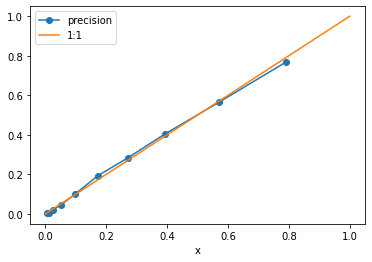

In [46]:
fig=plt.figure()

ax = calib_table.plot(x='mean_probability', y='precision', marker='o')
pd.DataFrame({'x':[0,1], '1:1':[0,1]}).plot(x='x', y='1:1', ax=ax)

<AxesSubplot:xlabel='q_bucket'>

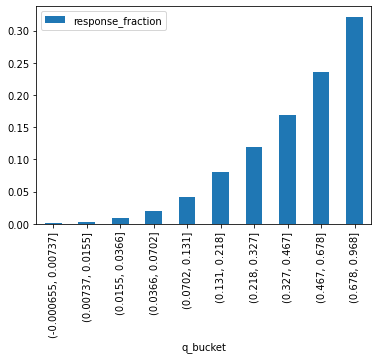

In [47]:
calib_table.plot(kind='bar', x='q_bucket', y='response_fraction')

,ActualProbability,PredictedProbability
0,0.027104,0.030839
1,0.164366,0.147099
2,0.254653,0.248396
3,0.371601,0.347549
4,0.442577,0.447004
5,0.562903,0.548608
6,0.619137,0.648865
7,0.729064,0.752539
8,0.825000,0.845691
9,0.930556,0.920317


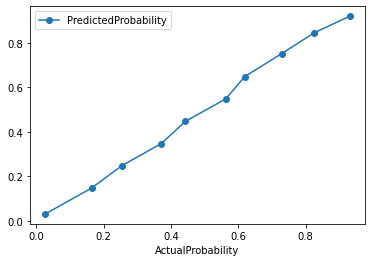

In [48]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(test_result['y_act'], test_result['y_pred_prob'], n_bins=10)

calib = pd.DataFrame(data={'ActualProbability':prob_true, 'PredictedProbability':prob_pred})
calib.plot(x='ActualProbability', y='PredictedProbability', marker='o')
calib

## Class Separation

<AxesSubplot:>

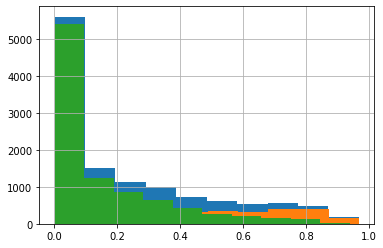

In [49]:
test_result['y_pred_prob'].hist()
test_result.query("y_act==1")['y_pred_prob'].hist()
test_result.query("y_act==0")['y_pred_prob'].hist()

<AxesSubplot:ylabel='Density'>

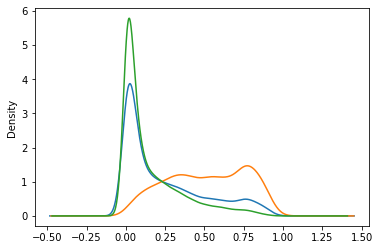

In [50]:
test_result['y_pred_prob'].plot(kind='kde')
test_result.query("y_act==1")['y_pred_prob'].plot(kind='kde')
test_result.query("y_act==0")['y_pred_prob'].plot(kind='kde')

#  8. Receiver operating characteristic (ROC)

ROC AUC Score = 0.8754616343516283


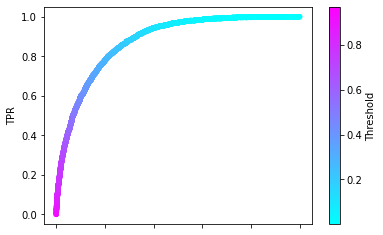

In [51]:
cmap = cm.get_cmap('cool') 

fpr, tpr, thresholds = metrics.roc_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)

roc = pd.DataFrame(data={'Threshold':thresholds[1:], 'FPR':fpr[1:], 'TPR':tpr[1:]})
roc.plot(kind='scatter', x='FPR', y='TPR', c='Threshold', cmap=cmap)

roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

print(F"ROC AUC Score = {roc_auc}")

In [52]:
roc.head()

,Threshold,FPR,TPR
0,0.968470,0.000000,0.000340
1,0.943633,0.000000,0.001700
2,0.940058,0.000107,0.001700
3,0.922287,0.000107,0.009177
4,0.921949,0.000213,0.009177


# 9. Precision Recall Curve (PRC)

<AxesSubplot:xlabel='Recall', ylabel='Precision'>

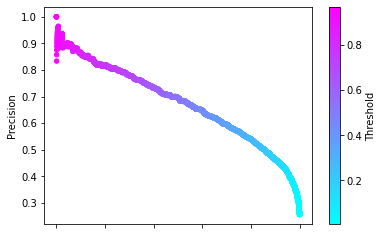

In [53]:
precision, recall, thresholds = metrics.precision_recall_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)

prc = pd.DataFrame(data={'Threshold':thresholds, 'Precision':precision[:-1], 'Recall':recall[:-1]})
prc.plot(kind='scatter', x='Recall', y='Precision', c='Threshold', cmap=cmap)

<AxesSubplot:xlabel='Threshold'>

<Figure size 432x288 with 0 Axes>

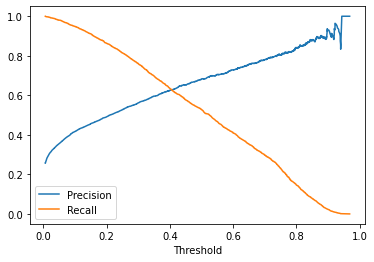

In [54]:
fig=plt.figure()

ax = prc.plot( x='Threshold', y='Precision')
prc.plot(x='Threshold', y='Recall', ax=ax)

# 10. Classification Report

In [55]:
from sklearn.metrics import classification_report

print(classification_report(test_result['y_act'], test_result['y_pred']))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      9387
           1       0.68      0.53      0.60      2942

    accuracy                           0.83     12329
   macro avg       0.77      0.73      0.74     12329
weighted avg       0.82      0.83      0.82     12329



<hr>
Last update 2022-11-15 by Sumudu Tennakoon

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.